In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xgboost as xgb
print(xgb.__version__)

2.1.0


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, average_precision_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from datetime import datetime

In [4]:
df = pd.read_csv("C:/Users/singh/Desktop/TIP_2/fraudTest.csv")   

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [10]:
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.time
df.info()



# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
#df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
#df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
#df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Pre-Processing

In [11]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [12]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [14]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')  #format='%d-%m-%Y %H:%M').dt.time

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


In [15]:
df.dtypes

trans_date    datetime64[ns]
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object

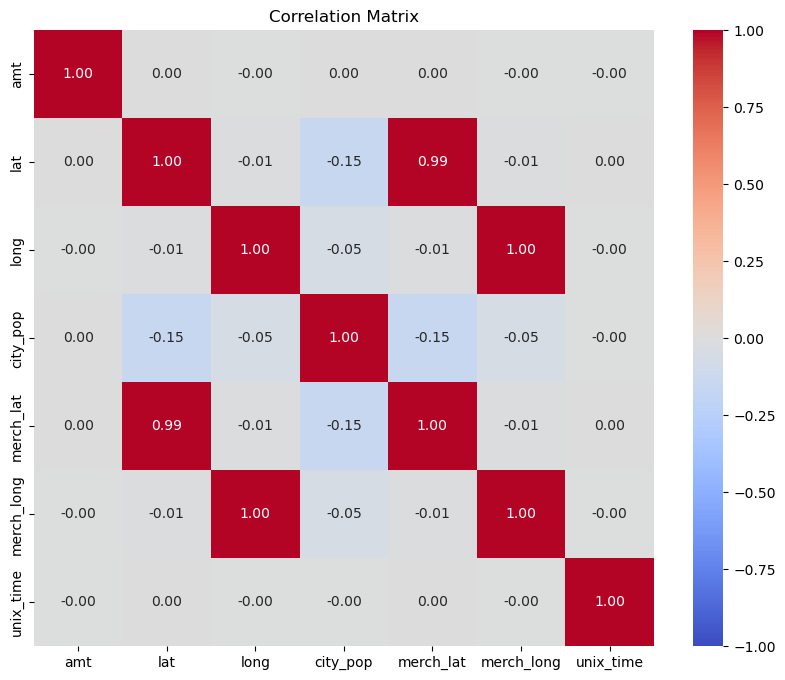

In [16]:
# Select numerical columns
numerical_columns_df = df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'unix_time']]
# Compute the correlation matrix
correlation_matrix = numerical_columns_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

1. Transaction Frequency Features

In [17]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean       614.733407
median     636.500000
min          6.000000
max       2144.000000
Name: count, dtype: float64

In [18]:
# Ensure 'trans_date' is in datetime format and extract the date part
df['trans_date'] = pd.to_datetime(df['trans_date']).dt.date

# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', 'trans_date'])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())

         cc_num  trans_date  transactions_per_day
0  2.291160e+15  2020-06-21                     2
1  3.573030e+15  2020-06-21                     4
2  3.598220e+15  2020-06-21                     3
3  3.591920e+15  2020-06-21                     3
4  3.526830e+15  2020-06-21                     4


In [19]:
# Compute the number of transactions per user in the training data
transactions_per_user_train = df['cc_num'].value_counts()

# Statistical summary of total transactions per user
stats_summary_train = transactions_per_user_train.agg(['mean', 'median', 'min', 'max'])
print("Statistical Summary of Total Transactions per User (Training Data):")
print(stats_summary_train)

# Compute the number of transactions per user in the test data
transactions_per_user_test = df['cc_num'].value_counts()

# Ensure the same aggregation is applied
# Adding this step to ensure proper transformation
stats_summary_test = transactions_per_user_test.agg(['mean', 'median', 'min', 'max'])
print("\nStatistical Summary of Total Transactions per User (Test Data):")
print(stats_summary_test)

Statistical Summary of Total Transactions per User (Training Data):
mean       614.733407
median     636.500000
min          6.000000
max       2144.000000
Name: count, dtype: float64

Statistical Summary of Total Transactions per User (Test Data):
mean       614.733407
median     636.500000
min          6.000000
max       2144.000000
Name: count, dtype: float64


In [20]:
# Ensure 'trans_date' is in datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week for each customer
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

         cc_num  Week  transaction_per_week
0  2.291160e+15    25                     2
1  3.573030e+15    25                     4
2  3.598220e+15    25                     3
3  3.591920e+15    25                     3
4  3.526830e+15    25                     4


In [21]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
6      30058
7      85848
8      88759
9      69533
10     69348
11     72635
12    139538
dtype: int64


In [22]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

         cc_num trans_date  transactions_per_month
0  2.291160e+15 2020-06-21                      34
1  3.573030e+15 2020-06-21                      49
2  3.598220e+15 2020-06-21                      55
3  3.591920e+15 2020-06-21                      33
4  3.526830e+15 2020-06-21                      56


In [23]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')
df['season'] = df['trans_date'].apply(season)


In [24]:
import pandas as pd
from datetime import datetime, time  # Import time class from datetime
from sklearn.preprocessing import LabelEncoder

# Define the function to map hours to parts of the day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Define a function to process 'trans_time' and extract part of the day
def process_time(df):
    # If trans_time is a time object, combine with a dummy date
    if isinstance(df['trans_time'].iloc[0], time):
        df['trans_time'] = df['trans_time'].apply(lambda t: datetime.combine(datetime.today(), t))
    
    # Convert to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['trans_time']):
        df['trans_time'] = pd.to_datetime(df['trans_time'])
    
    # Extract hour from the trans_time column
    df['hour'] = df['trans_time'].dt.hour

    # Apply the part_of_day function
    df['part_of_day'] = df['hour'].apply(part_of_day)

    # Drop the hour column if not needed
    df.drop(columns=['hour'], inplace=True)

    return df

# Apply the function to your DataFrame
df = process_time(df)

# Initialize the LabelEncoder for the part_of_day feature
part_of_day_encoder = LabelEncoder()

# Fit and transform on the DataFrame
df['part_of_day'] = part_of_day_encoder.fit_transform(df['part_of_day'])

2. User Transaction Behavior

In [25]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')

## 3. User-Based Features: Age and Gender

3.1 Calculate age of user based on DOB and transation date

In [26]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

mean      46.390496
median    44.000000
min       15.000000
max       96.000000
Name: age, dtype: float64

3.2 Convert gender into binary values

In [27]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)


 The number of cutomers based on age is:
gender
F    304886
M    250833
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    21155705.55
M    17407197.56
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    69.388905
M    69.397558
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       46.300604    44.0
M       46.499759    45.0
----------------------------------------


## 4. Fraud Transaction Analysis

4.1 Calculate fraud ratio using fraudulent transactions and total transactions

In [28]:
# Calculate fraudulent transactions per user
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')

# Merge to get fraud ratio per user
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] / fraud_ratio_per_user['total_transactions']

# Merge fraud_ratio into the original dataset
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')

## 5. Geography Analysis

5.1 Distance calculation using Haversine calculation

In [29]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

5.2 Categorize type of cities based on the population

In [30]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)


Aggregated transaction amounts by city:
                          city       amt
0                      Achille   9511.00
1                      Acworth  80383.39
2                        Adams  20631.64
3                        Afton  59000.66
4                        Akron  18512.11
..                         ...       ...
844                Woods Cross  20281.72
845                  Woodville  42032.17
846  Yellowstone National Park  16073.89
847                    Zaleski  59080.41
848                    Zavalla  47801.39

[849 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK    66071.94
1     AL  1127922.81
2     AR  1027950.44
3     AZ   347901.59
4     CA  1768791.26
5     CO   447073.46
6     CT   205176.90
7     DC   108781.32
8     FL  1293183.50
9     GA   780302.43
10    HI    64858.25
11    IA   770590.61
12    ID   197705.27
13    IL  1309975.89
14    IN   846750.31
15    KS   711303.48
16   

In [31]:
# Function to categorize city_pop
def categorize_population(population):
    if population < 1000:
        return 'Small'
    elif 1000 <= population <= 10000:
        return 'Medium'
    else:
        return 'Large'
#Apply the function to create a column called "pop_caregory" for train data
df['pop_cat'] = df['city_pop'].apply(categorize_population)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 38 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date               555719 non-null  datetime64[ns]
 1   trans_time               555719 non-null  datetime64[ns]
 2   cc_num                   555719 non-null  int64         
 3   merchant                 555719 non-null  object        
 4   category                 555719 non-null  object        
 5   amt                      555719 non-null  float64       
 6   first                    555719 non-null  object        
 7   last                     555719 non-null  object        
 8   gender                   555719 non-null  object        
 9   street                   555719 non-null  object        
 10  city                     555719 non-null  object        
 11  state                    555719 non-null  object        
 12  zip             

In [32]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [33]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables into numerical values
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])

In [34]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

def create_fuzzy_features(df):
    # 1. Fuzzy transaction amount
    max_amt = df['amt'].max()
    amount = ctrl.Antecedent(np.arange(0, max_amt + 1, 1), 'amount')
    amount['low'] = fuzz.trimf(amount.universe, [0, 0, min(50, max_amt)])
    amount['medium'] = fuzz.trimf(amount.universe, [0, min(50, max_amt), min(100, max_amt)])
    amount['high'] = fuzz.trimf(amount.universe, [min(50, max_amt), min(100, max_amt), max_amt])

    df['fuzzy_amount_low'] = fuzz.interp_membership(amount.universe, amount['low'].mf, df['amt'])
    df['fuzzy_amount_medium'] = fuzz.interp_membership(amount.universe, amount['medium'].mf, df['amt'])
    df['fuzzy_amount_high'] = fuzz.interp_membership(amount.universe, amount['high'].mf, df['amt'])

    # 2. Fuzzy age
    max_age = df['age'].max()
    age = ctrl.Antecedent(np.arange(0, max_age + 1, 1), 'age')
    age['young'] = fuzz.trimf(age.universe, [0, 0, min(30, max_age)])
    age['middle'] = fuzz.trimf(age.universe, [20, min(40, max_age), min(60, max_age)])
    age['old'] = fuzz.trimf(age.universe, [min(50, max_age), max_age, max_age])

    df['fuzzy_age_young'] = fuzz.interp_membership(age.universe, age['young'].mf, df['age'])
    df['fuzzy_age_middle'] = fuzz.interp_membership(age.universe, age['middle'].mf, df['age'])
    df['fuzzy_age_old'] = fuzz.interp_membership(age.universe, age['old'].mf, df['age'])

    # 3. Fuzzy transaction frequency
    max_freq = df['transactions_per_season'].max()
    freq = ctrl.Antecedent(np.arange(0, max_freq + 1, 1), 'frequency')
    freq['low'] = fuzz.trimf(freq.universe, [0, 0, min(200, max_freq)])
    freq['medium'] = fuzz.trimf(freq.universe, [100, min(300, max_freq), min(500, max_freq)])
    freq['high'] = fuzz.trimf(freq.universe, [min(400, max_freq), max_freq, max_freq])

    df['fuzzy_freq_low'] = fuzz.interp_membership(freq.universe, freq['low'].mf, df['transactions_per_season'])
    df['fuzzy_freq_medium'] = fuzz.interp_membership(freq.universe, freq['medium'].mf, df['transactions_per_season'])
    df['fuzzy_freq_high'] = fuzz.interp_membership(freq.universe, freq['high'].mf, df['transactions_per_season'])

    # 4. Fuzzy fraud ratio
    max_fraud_ratio = df['fraud_ratio'].max()
    fraud_ratio = ctrl.Antecedent(np.arange(0, max_fraud_ratio + 0.001, 0.001), 'fraud_ratio')
    fraud_ratio['low'] = fuzz.trimf(fraud_ratio.universe, [0, 0, min(0.005, max_fraud_ratio)])
    fraud_ratio['medium'] = fuzz.trimf(fraud_ratio.universe, [0.001, min(0.005, max_fraud_ratio), min(0.01, max_fraud_ratio)])
    fraud_ratio['high'] = fuzz.trimf(fraud_ratio.universe, [min(0.005, max_fraud_ratio), max_fraud_ratio, max_fraud_ratio])

    df['fuzzy_fraud_ratio_low'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['low'].mf, df['fraud_ratio'])
    df['fuzzy_fraud_ratio_medium'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['medium'].mf, df['fraud_ratio'])
    df['fuzzy_fraud_ratio_high'] = fuzz.interp_membership(fraud_ratio.universe, fraud_ratio['high'].mf, df['fraud_ratio'])

    return df

# Apply the function to the DataFrame
df = create_fuzzy_features(df.copy())

# List new fuzzy features
fuzzy_features = [col for col in df.columns if col.startswith('fuzzy_')]
print("\nNew fuzzy features:")
print(fuzzy_features)


New fuzzy features:
['fuzzy_amount_low', 'fuzzy_amount_medium', 'fuzzy_amount_high', 'fuzzy_age_young', 'fuzzy_age_middle', 'fuzzy_age_old', 'fuzzy_freq_low', 'fuzzy_freq_medium', 'fuzzy_freq_high', 'fuzzy_fraud_ratio_low', 'fuzzy_fraud_ratio_medium', 'fuzzy_fraud_ratio_high']


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of columns to drop
columns_to_drop = ['trans_date', 'trans_time', 'dob', 'first', 'last', 'street',
                   'trans_num', 'gender', 'zip', 'long', 'lat', 'job', 'unix_time',
                   'merchant', 'transaction_per_week', 'transaction_per_season',
                   'std_trans_amount', 'med_trans_amount', 'pop_cat','cc_num']

# Drop specified columns from df
df = df.drop(columns=columns_to_drop, errors='ignore')

# Initialize the LabelEncoder
season_encoder = LabelEncoder()
category_encoder = LabelEncoder()
city_encoder = LabelEncoder()
state_encoder = LabelEncoder()

# Fit on df and transform df
df['category'] = category_encoder.fit_transform(df['category'])
df['city'] = city_encoder.fit_transform(df['city'])
df['state'] = state_encoder.fit_transform(df['state'])

# Display the transformed DataFrame
print(df.head())

   category    amt  city  state  city_pop  merch_lat  merch_long  is_fraud  \
0        10   2.86   157     39    333497  33.986391  -81.200714         0   
1        10  29.84    16     43       302  39.450498 -109.960431         0   
2         5  41.28    61     33     34496  40.495810  -74.196111         0   
3         9  60.05   764      8     54767  28.812398  -80.883061         0   
4        13   3.19   247     21      1126  44.959148  -85.884734         0   

   transactions_per_day  Week  ...  fuzzy_amount_high  fuzzy_age_young  \
0                     2    25  ...              0.000              0.0   
1                     4    25  ...              0.000              0.0   
2                     3    25  ...              0.000              0.0   
3                     3    25  ...              0.201              0.0   
4                     4    25  ...              0.000              0.0   

  fuzzy_age_middle  fuzzy_age_old  fuzzy_freq_low  fuzzy_freq_medium  \
0             

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   category                  555719 non-null  int64  
 1   amt                       555719 non-null  float64
 2   city                      555719 non-null  int64  
 3   state                     555719 non-null  int64  
 4   city_pop                  555719 non-null  int64  
 5   merch_lat                 555719 non-null  float64
 6   merch_long                555719 non-null  float64
 7   is_fraud                  555719 non-null  int64  
 8   transactions_per_day      555719 non-null  int64  
 9   Week                      555719 non-null  UInt32 
 10  transactions_per_month    555719 non-null  int64  
 11  transactions_per_season   555719 non-null  int64  
 12  season                    555719 non-null  object 
 13  part_of_day               555719 non-null  i

# Apply Model

In [37]:
# Print the list of all column names in the DataFrame
print("Columns in the DataFrame:")
print(df.columns.tolist())

Columns in the DataFrame:
['category', 'amt', 'city', 'state', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'transactions_per_day', 'Week', 'transactions_per_month', 'transactions_per_season', 'season', 'part_of_day', 'avg_trans_amount', 'total_trans_amount', 'age', 'fraud_ratio', 'distance_to_merch', 'fuzzy_amount_low', 'fuzzy_amount_medium', 'fuzzy_amount_high', 'fuzzy_age_young', 'fuzzy_age_middle', 'fuzzy_age_old', 'fuzzy_freq_low', 'fuzzy_freq_medium', 'fuzzy_freq_high', 'fuzzy_fraud_ratio_low', 'fuzzy_fraud_ratio_medium', 'fuzzy_fraud_ratio_high']


In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Function to encode categorical features
def encode_categorical_features(df, categorical_cols):
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Ensure the column is treated as string
        label_encoders[col] = le
    return df, label_encoders

# Define categorical columns
categorical_cols = ['season']  # Add other categorical columns if needed

# Encode categorical features in the DataFrame
df, label_encoders = encode_categorical_features(df, categorical_cols)

# Step 1: Split the balanced data into features (X) and target (y)
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the previously saved model
best_xgb = joblib.load('Main_model.joblib')  # Replace with your actual model filename

# Step 3: Make predictions on the test data
y_pred = best_xgb.predict(X_test)

# Print the classification report
print("Classification Report on the test dataset:")
print(classification_report(y_test, y_pred))

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix on the test dataset:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on the test dataset')
plt.show()

# Print the accuracy of the model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print("\nModel accuracy on the test dataset:", accuracy)

FileNotFoundError: [Errno 2] No such file or directory: 'Main_model.joblib'

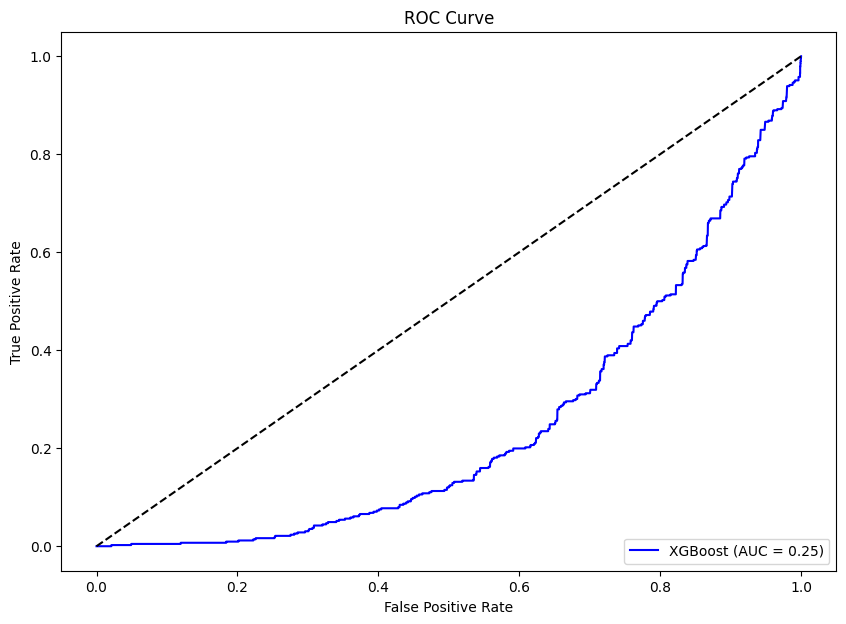

In [147]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Plot ROC curve
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()